A1. Building a language detector using Regular Expressions.

In [1]:
import re

     
def detect_language(text):
    
    greek_pattern = re.compile(r'[αάβγδεέζηήιίκλμνξοόπρσςτυύφχψωώΑΆΒΓΔΕΈΖΗΉΙΊΚΛΜΝΞΟΌΠΡΣΤΥΎΦΧΨΩΏ\s;,!?. \' ]+')
    greeklish_pattern = re.compile(r'[a-zA-Z\s]*[αάβγδεέζηήιίκλμνξοόπρσςτυύφχψωώΑΆΒΓΔΕΈΖΗΉΙΊΚΛΜΝΞΟΌΠΡΣΤΥΎΦΧΨΩΏ]+[a-zA-Z\s]*')  
    english_pattern = re.compile(r'[a-zA-Z\s;,!?.\']+')  
    
    #Check if the text matches any of the patterns
    if greek_pattern.fullmatch(text):
        return "Greek"
    elif english_pattern.fullmatch(text):
        return "English"
    elif greeklish_pattern.search(text):
        return "greeklish"
    else:
        return "Other"

    

#Example usage
text_greeklish1 = "Ένα dyo"
text_greeklish2 = "kalimera, ti kaneis?"
text_greek = "Πώς πήγε η μέρα σου?"
text_english = "Dreams can inspire us."
text_other = "eres débil"                            #Particularly , spanish (due to the different character ¿)
language1 = detect_language(text_greeklish1)
language2 = detect_language(text_greeklish2)
language3 = detect_language(text_greek)
language4 = detect_language(text_english)
language5 = detect_language(text_other)
print(f"{text_greeklish1}: {language1}")
print(f"{text_greeklish2}: {language2}")
print(f"{text_greek}: {language3}")
print(f"{text_english}: {language4}")
print(f"{text_other}: {language5}")


Ένα dyo: greeklish
kalimera, ti kaneis?: English
Πώς πήγε η μέρα σου?: Greek
Dreams can inspire us.: English
eres débil: Other


A2. 1st step: Import a ground truth evaluation dataset and apply our classifier

In [51]:
import csv

DIR = 'C:/Users/Drogias/OneDrive/Υπολογιστής/MSc Data Science AUEB/1st semester/Practical Data Science/Projects/A2/'
file = DIR + 'gold.csv'

text = []
labels = []
language = []
with open(file, newline='', encoding='utf-8') as csvfile:         #Open the CSV file
    csv_reader = csv.reader(csvfile)

    next(csv_reader)  # Skips the first row (header)
    
    for row in csv_reader:
       
        text.append(row[0])
        labels.append(row[1])
        
print(text)
for text_ in text:
    language.append(detect_language(text_))
print(language)


['Los parques nacionales en España son espectaculares.', 'La música es una fuente de alegría.', 'Grass is green in color.', 'Τα ζώα φέρνουν χαρά στις ζωές μας.', 'Poso xrono pernas sto spiti sou?', 'Ti thes na kanoume avrio?', 'אני לא מדבר באופן רציף בשפה הזו, אבל אני מנסה ללמוד.', 'Dreams can inspire us.', 'Η απλότητα φέρνει σαφήνεια στη ζωή.', 'Tha pame gia geitonia stin periochi.', 'Thelo na matho na zw sto xwro.', 'Pame gia vradini prooptiki?', 'Ksero na milao gallika kai italika.', 'Eimai poli efxaristimenos gia tin voitheia sou.', 'Clean water is essential for life.', 'Το βιβλίο ήταν γεμάτο αγωνία.', 'Το καθαρό νερό είναι ουσιώδες για τη ζωή.', 'Las ferias y mercados españoles son vibrantes.', 'Den ksero ti na valo gia na fago.', 'Friendship is precious.', 'Success requires hard work.', 'Tha pame gia geitonia sto kentro.', 'Εγω παντως ρε φιλε, μονο ενα Priest πετυχα απο το guild σας, του μιλησα και εκανε τον κινεζο. Και ειμασταν και σε rdf παρεα.', 'Paei na treksei kathe mera gia

In [52]:
len(labels)

364

In [53]:
print(labels)

['Other', 'Other', 'English', 'Greek', 'Greeklish', 'Greeklish', 'Other', 'English', 'Greek', 'Greeklish', 'Greeklish', 'Greeklish', 'Greeklish', 'Greeklish', 'English', 'Greek', 'Greek', 'Other', 'Greeklish', 'English', 'English', 'Greeklish', 'Greeklish', 'Greeklish', 'Other', 'Greek', 'Other', 'Other', 'Greek', 'Greek', 'Greek', 'English', 'Greek', 'Other', 'Greeklish', 'Greeklish', 'English', 'Greeklish', 'Other', 'Greek', 'Greeklish', 'Greek', 'Greeklish', 'Other', 'English', 'Greek', 'English', 'English', 'Other', 'Other', 'Greek', 'Greek', 'Greeklish', 'Greek', 'English', 'English', 'Greeklish', 'Greeklish', 'English', 'Other', 'Greeklish', 'English', 'Other', 'Greeklish', 'Other', 'Greeklish', 'Greeklish', 'Greeklish', 'English', 'Greeklish', 'Other', 'Greeklish', 'Other', 'Other', 'English', 'English', 'Greek', 'Other', 'Other', 'Other', 'Other', 'English', 'Greek', 'English', 'Other', 'Greek', 'Greek', 'Greeklish', 'Greek', 'English', 'Other', 'Other', 'Other', 'Greeklish', '

A2. 2nd step: Evaluate our classifier

In [54]:
def calculate_accuracy(labels,pred):
    agree = 0
    total = len(labels)
    for i in range(0, total):
        if (labels[i] == pred[i]):
            agree += 1

    rate = agree / total
    return rate

In [55]:
accuracy = calculate_accuracy(labels,language)
print("Accuracy of our classifier: ", round(accuracy * 100, 2), "%")

Accuracy of our classifier:  57.69 %


B. Crawl Youtube for videos with Greek posts

In [7]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

B1. Apply our language detector to the page’s title.

In [8]:
import requests
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException
import numpy as np


# URL of the YouTube page
url = "https://www.youtube.com/watch?v=-zLurmhbN_o"

# Send a GET request to the YouTube page
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the title of the video
title = soup.find("title").text if soup.find("title") else "Title Not Found"
if "- YouTube" in title:
    title = title.replace(" - YouTube", "")

#print(title)
video_names = []
links = []
lang_title = detect_language(title)                            #B1
print("Language of the title estimated to be : ", lang_title)

Language of the title estimated to be :  Greek


B2-4: 
Parsing all the comments of the page but only if the title is in Greek/Greeklish,
using a strategy to jump to other pages that *will likely* have Greek/Greeklish titles,
and finally forming a CSV with the crawled information (crawl.csv).

In [9]:
comments_first = []                                        #Comments of the first video
data = []
with Chrome() as driver:                                   # path to geckodriver for older versions 
    driver.get(url)
    wait = WebDriverWait(driver,15)
    
    for _ in range(5): 
        driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
        time.sleep(2)  
    
    
    print("Processing video:", title, "with estimated language: ", lang_title)
    comments = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text")))
    
    for comment in comments:
        comments_first.append(comment.text)
    data.append({'Title': title, 'Comments': '\n'.join(comments_first)})
    recommended_videos = driver.find_elements(By.CSS_SELECTOR,'ytd-compact-video-renderer')       #Fetch all the videos on the feed
    
    for video in recommended_videos:
        title_element = video.find_element(By.CSS_SELECTOR, '#video-title').text
        video_names.append(title_element)                                                         #Save their titles
        
        link = video.find_element(By.CSS_SELECTOR, 'a').get_attribute('href')                        
        links.append(link) 

        
def get_video_comments(url):
    video_comments = []                                          #Video's comments
    with Chrome() as driver:                                   # path to geckodriver for older versions 
        driver.get(url)
        wait = WebDriverWait(driver,15)
    
      
        for _ in range(5): 
            driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
            time.sleep(2)  # Wait for the page to load
    
        
        try:
            comments = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text")))
            for comment in comments:
                video_comments.append(comment.text)
        except TimeoutException:
            print("Exception here")
        
        
    return video_comments
    

for i in range(0, len(links)): 
    lang = detect_language(video_names[i])
    print("Processing video:", video_names[i], "with estimated language: ", lang)
    if lang == "Greek" or lang == "greeklish" :
        comments_vid = get_video_comments(links[i])
        data.append({'Title': video_names[i], 'Comments': '\n'.join(comments_vid)})


csv_file = DIR + 'crawl.csv'
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    fieldnames = ['Title', 'Comments']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)
    print(f'CSV file "{csv_file}" has been created successfully.')

Processing video: Ο Τσίπρας ξεχνά τα αγγλικά του μπροστά στον Κλίντον with estimated language:  Greek
Processing video: Όλα τα αγγλικά του Τσίπρα with estimated language:  Greek
Processing video: ΡΑΔΙΟ ΑΡΒΥΛΑ - Obama - Τσίπρας (22/11/2016) with estimated language:  greeklish
Processing video: Τα τέλεια αγγλικά του Mr Tsipras 😂 with estimated language:  greeklish
Processing video: Μεϊμαράκης για Τσίπρα "Άντε γαμήσου μαλάκα" with estimated language:  greeklish
Processing video: 10 Λόγοι που Αγοράζουμε Μάρκες | Greekonomics #38 with estimated language:  greeklish
Processing video: Πρωθυπουργία, ΛΟΑΤΚΙ Γάμος, Εκκλησία και κράτος | KRIMA #83 ft. Αλέξης Τσίπρας with estimated language:  greeklish
Processing video: Η ερώτηση του δημοσιογράφου στον Τσίπρα για τα Αγγλικά. with estimated language:  Greek
Processing video: Η υποδοχή του Προέδρου των ΗΠΑ στο Μέγαρο Μαξίμου | ΕΡΤ with estimated language:  greeklish
Exception here
Processing video: Χατζηδάκης: Πώς γίνεται να είσαι ελεύθ. επαγγελμ. 1

In [10]:
print(links)

['https://www.youtube.com/watch?v=Vjt6ai5IEaA', 'https://www.youtube.com/watch?v=UvS9z2VVkgw', 'https://www.youtube.com/watch?v=owYVjgkXse8', 'https://www.youtube.com/watch?v=ij1Ln2vIY2M', 'https://www.youtube.com/watch?v=aDgaQ_Ir8C8', 'https://www.youtube.com/watch?v=ZMNMYN86RUY', 'https://www.youtube.com/watch?v=TNTs6z7x2uA', 'https://www.youtube.com/watch?v=wkgAzizpNFs', 'https://www.youtube.com/watch?v=4cMKZOoR1mo', 'https://www.youtube.com/watch?v=wWENDMNaEy8', 'https://www.youtube.com/watch?v=DnnDAa__8Ek', 'https://www.youtube.com/watch?v=kC8n2dnGch8', 'https://www.youtube.com/watch?v=6r3kFtMp3_c', 'https://www.youtube.com/watch?v=ZOohvb3GJwQ', 'https://www.youtube.com/watch?v=6mAGPh2b7Ck', 'https://www.youtube.com/watch?v=ZphWWQeMCuQ', 'https://www.youtube.com/watch?v=BKPYaARIiPk', 'https://www.youtube.com/watch?v=dc9ujQlop9s', 'https://www.youtube.com/watch?v=_299HH4bI5Y', 'https://www.youtube.com/watch?v=U0U-vGaZrZU']


In [11]:
print(video_names)

['Όλα τα αγγλικά του Τσίπρα', 'ΡΑΔΙΟ ΑΡΒΥΛΑ - Obama - Τσίπρας (22/11/2016)', 'Τα τέλεια αγγλικά του Mr Tsipras 😂', 'Μεϊμαράκης για Τσίπρα "Άντε γαμήσου μαλάκα"', '10 Λόγοι που Αγοράζουμε Μάρκες | Greekonomics #38', 'Πρωθυπουργία, ΛΟΑΤΚΙ Γάμος, Εκκλησία και κράτος | KRIMA #83 ft. Αλέξης Τσίπρας', 'Η ερώτηση του δημοσιογράφου στον Τσίπρα για τα Αγγλικά.', 'Η υποδοχή του Προέδρου των ΗΠΑ στο Μέγαρο Μαξίμου | ΕΡΤ', 'Χατζηδάκης: Πώς γίνεται να είσαι ελεύθ. επαγγελμ. 10 χρόνια και να βγάζεις λιγότερα από τον υπάλληλό', 'Απίστευτο δυστύχημα στη Μύκονο: Αγελάδα κάρφωσε με τα κέρατά της άνδρα στην καρδιά | Σήμερα', 'Ο Αλέξης Τσίπρας στο ετήσιο Συνέδριο του Clinton Global Initiative στη Νέα Υόρκη', 'Σήμερα | Ξεπέρασε κάθε όριο η κόντρα Τσίπρα-Μητσοτάκη | 09/05/2019', 'Αγγλικά Τσίπρα εντός κειμένου vs εκτός κειμένου', 'Στον Ενικό - Αλ. Τσίπρας - 17.9.2015', 'Μητσοτάκης vs Τσίπρα στο CNN', 'H erwthsh ston Tsipra gia to ti elege gia ton Tramp Luben TV', 'Εφιάλτης στην Ευρώπη ο κίνδυνος μίας ακροδεξ

In [12]:
print(len(links))

20


In [13]:
print(len(video_names))

20


III. Improve language detection

1. Benchmarking text classification (scikit) algorithms for the language detection task,
outperforming our rule-based classifier and naive baselines. 

In [151]:
#I.
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv(DIR + 'gold.csv')


train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)






In [149]:
train_set

,text\t,language,Random no. split
210,Failure is a stepping stone to success.,English,0.962641
339,Τα λουλούδια ανθίζουν την άνοιξη.,Greek,0.306668
299,Tha pame sto mousio gia ena ergo tehnis.,Greeklish,0.965862
75,Self-care is crucial for well-being.,English,0.956872
84,El cine español tiene reconocimiento internaci...,Other,0.479067
...,...,...,...
71,Den mporo na pao sto parti avrio.,Greeklish,0.093008
106,"Eu gosto de aprender línguas novas, é um desaf...",Other,0.513558
270,Stars twinkle in the night sky.,English,0.205084
348,Thelo na matho na paizo mpasket.,Greeklish,0.811394


In [150]:
test_set

,text\t,language,Random no. split
193,"Eimai poli kala, euxaristo.",Greeklish,0.508049
33,La artesanía española es variada y colorida.,Other,0.412079
15,Το βιβλίο ήταν γεμάτο αγωνία.,Greek,0.100799
347,Science fiction explores future possibilities.,English,0.575955
57,Exo poli douleia sto grapheio.,Greeklish,0.918815
...,...,...,...
202,The internet offers endless information.,English,0.271811
82,Η κολύμβηση είναι μια εξαιρετική άσκηση.,Greek,0.952507
94,Το μαγείρεμα μπορεί να είναι ένα χαλαρωτικό χό...,Greek,0.761543
192,Teamwork leads to success.,English,0.036036


In [17]:
from sklearn.metrics import confusion_matrix
class_names = ['Greek', 'Greeklish', 'English', 'Other']  

def plot_confusion_matrix(classifier, y_test, pred):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 4))
    plt.title(f"Confusion Matrix for {classifier}")
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels = class_names, yticklabels = class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Logistic Regression F1_score: [0.76923077 0.85245902 0.92857143 0.96774194]


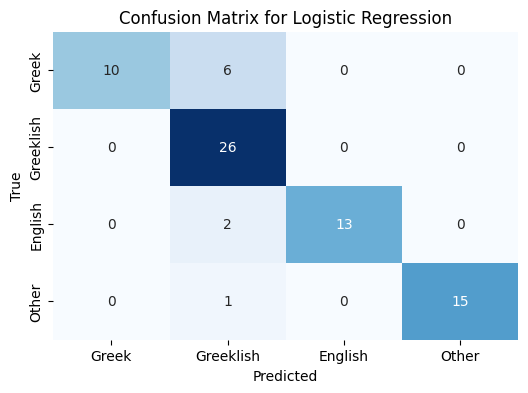



Decision Tree F1_score: [0.8        0.85106383 0.92857143 0.96774194]


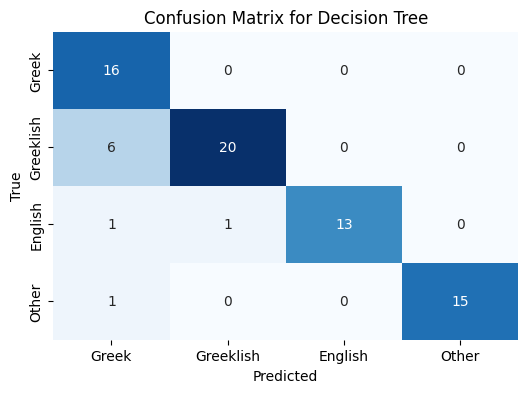



Random Forest F1_score: [0.76923077 0.85245902 0.92857143 0.96774194]


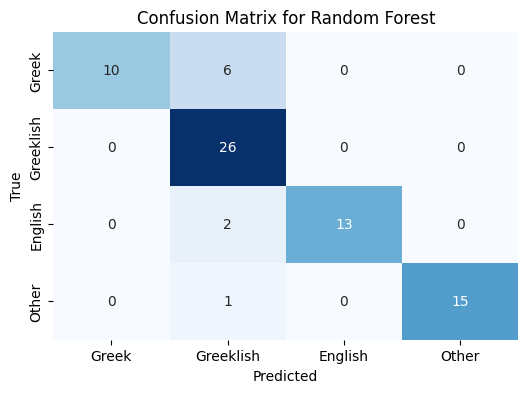



Naive Bayes F1_score: [0.85714286 0.92       0.75675676 0.96774194]


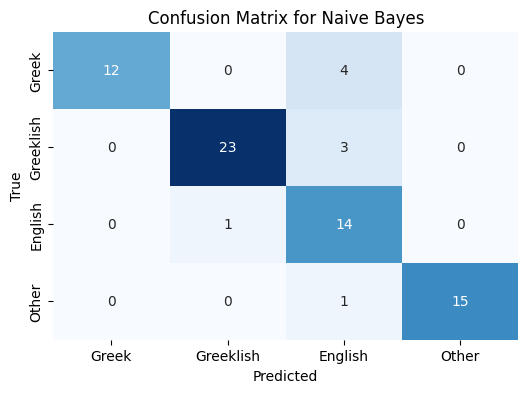



KNN F1_score (K = 10): [0.66666667 0.68292683 0.84615385 0.96774194]


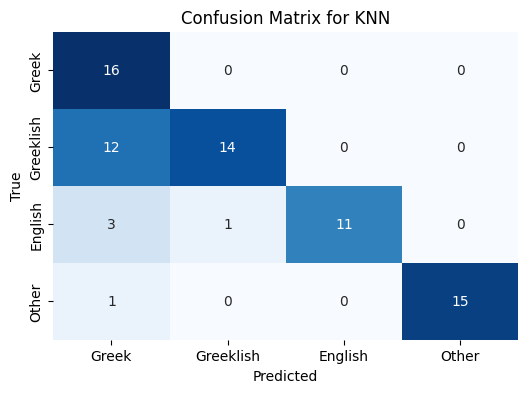

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns

data = pd.read_csv(DIR + 'gold.csv')

text_data = data['text\t']
target = data['language']

text_train, text_test, y_train, y_test = train_test_split(text_data, target, test_size=0.2, random_state=42) #Split the data into training and test sets 


vectorizer = CountVectorizer()                                     # Help deal with string data
X_train = vectorizer.fit_transform(text_train).toarray()            # toarray(): make the array dense (required for Bayes)
X_test = vectorizer.transform(text_test).toarray()                  # toarray(): make the array dense (required for Bayes)  
  

# Initialize classifiers
svm_classifier = SVC(kernel='linear')  
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
naive_bayes = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 10)


# Fit the classifiers on the training data
svm_classifier.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
KNN.fit(X_train, y_train)

# Make predictions using the trained models
y_pred_svm = svm_classifier.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)
y_pred_knn = KNN.predict(X_test)

# Evaluate accuracy of the models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

f1_lr = f1_score(y_test, y_pred_lr, average=None)
f1_dt = f1_score(y_test, y_pred_dt, average=None)
f1_rf = f1_score(y_test, y_pred_rf, average=None)
f1_nb = f1_score(y_test, y_pred_nb, average=None)
f1_knn = f1_score(y_test, y_pred_knn, average=None)


# Print the accuracy scores
print("Logistic Regression F1_score:", f1_lr)
plot_confusion_matrix("Logistic Regression", y_test, y_pred_lr)
print("\n")
print("Decision Tree F1_score:", f1_dt)
plot_confusion_matrix("Decision Tree", y_test, y_pred_dt)
print("\n")
print("Random Forest F1_score:", f1_rf)
plot_confusion_matrix("Random Forest", y_test, y_pred_rf)
print("\n")
print("Naive Bayes F1_score:", f1_nb)
plot_confusion_matrix("Naive Bayes", y_test, y_pred_nb)
print("\n")
print("KNN F1_score (K = 10):", f1_knn)
plot_confusion_matrix("KNN", y_test, y_pred_knn)
print("\n")


C2. Applying our best classifier to each post to annotate mechanically the language of each
comment and explore the annotated data.

In [21]:

posts = pd.read_csv(DIR + "crawl.csv")
print(posts)

sentences = [[] for _ in range(len(posts))]
non_null_indexes = []

non_null_comments = posts[~posts['Comments'].isnull()]
for index,row in non_null_comments.iterrows():
    non_null_indexes.append(index)
    
print(non_null_indexes)
for i in non_null_indexes:  
    sentences[i].append(posts['Comments'][i].split('\n'))
                                         
        


                                                Title  \
0   Ο Τσίπρας ξεχνά τα αγγλικά του μπροστά στον Κλ...   
1                           Όλα τα αγγλικά του Τσίπρα   
2         ΡΑΔΙΟ ΑΡΒΥΛΑ - Obama - Τσίπρας (22/11/2016)   
3                  Τα τέλεια αγγλικά του Mr Tsipras 😂   
4         Μεϊμαράκης για Τσίπρα "Άντε γαμήσου μαλάκα"   
5   10 Λόγοι που Αγοράζουμε Μάρκες | Greekonomics #38   
6   Πρωθυπουργία, ΛΟΑΤΚΙ Γάμος, Εκκλησία και κράτο...   
7   Η ερώτηση του δημοσιογράφου στον Τσίπρα για τα...   
8   Η υποδοχή του Προέδρου των ΗΠΑ στο Μέγαρο Μαξί...   
9   Χατζηδάκης: Πώς γίνεται να είσαι ελεύθ. επαγγε...   
10  Απίστευτο δυστύχημα στη Μύκονο: Αγελάδα κάρφωσ...   
11  Ο Αλέξης Τσίπρας στο ετήσιο Συνέδριο του Clint...   
12  Σήμερα | Ξεπέρασε κάθε όριο η κόντρα Τσίπρα-Μη...   
13    Αγγλικά Τσίπρα εντός κειμένου vs εκτός κειμένου   
14               Στον Ενικό - Αλ. Τσίπρας - 17.9.2015   
15                       Μητσοτάκης vs Τσίπρα στο CNN   
16  Εφιάλτης στην Ευρώπη ο κίνδ

In [22]:
pred = [[] for _ in range(len(posts))]
sentences_new = [vectorizer.transform(sentences[i][0]) for i in non_null_indexes]
    
  
#print(X_new)

for index,i in enumerate(non_null_indexes):
    for j in range(len(sentences[i][0])):
        pred[non_null_indexes[index]].append(decision_tree.predict(sentences_new[index][0]))
        
            
            

# Printing the pred lists
for i in range(len(posts)):
    print(f"Post{i}: {pred[i]}")


Post0: [array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), array(['Greek'], dtype=object), 

In [23]:
languages = [[] for _ in range(len(posts))]

for i, pred_item in enumerate(pred):
    for j in range(len(pred_item)):
        languages[i].append(pred_item[j][0])

# Printing the languages lists
for i in range(len(languages)):
    print(f"languages_{i}: {languages[i]}")


languages_0: ['Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Gree

In [24]:
print(languages)

[['Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek', 'Greek']

A good idea would be to make a plot (bar chart) where we will see the number of comments each video has.

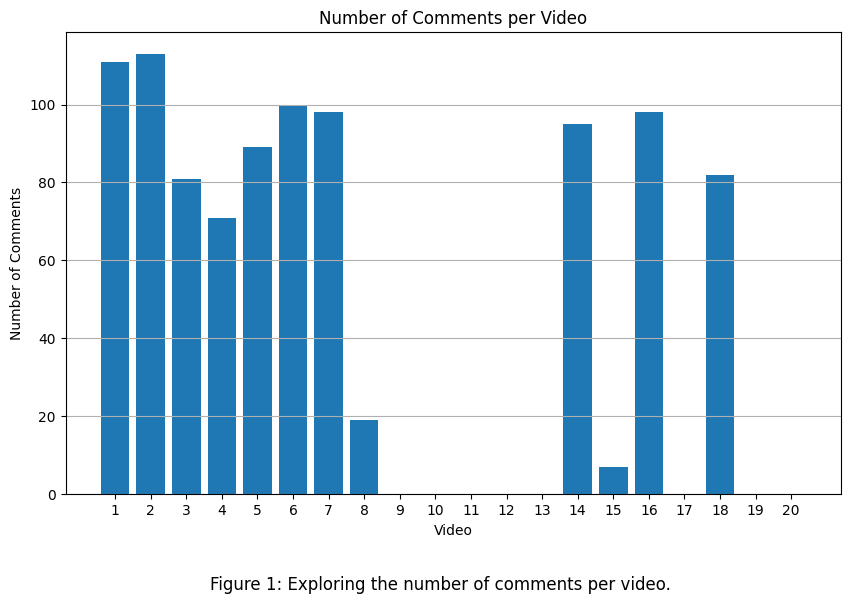

In [147]:
import matplotlib.pyplot as plt
import pandas as pd


languages_count = [len(video) for video in languages]

#Create a DataFrame for visualization
data = pd.DataFrame({'Video': range(1, len(languages) + 1), 'Comment Count': languages_count})


plt.figure(figsize=(10, 6))
plt.bar(data['Video'], data['Comment Count'])
plt.xlabel('Video')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Video')
plt.xticks(range(1, len(languages) + 1))
plt.grid(axis='y')
txt="Figure 1: Exploring the number of comments per video."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


We can also make a pie chart to show us the language distribution across all comments

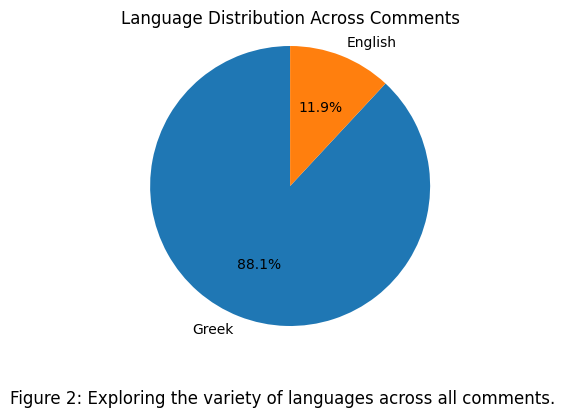

In [146]:
from collections import Counter


flattened_languages = [lang for video in languages for lang in video]
language_counts = Counter(flattened_languages)


plt.figure(figsize=(6, 4))
plt.pie(language_counts.values(), labels=language_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Language Distribution Across Comments')
plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle
txt2="Figure 2: Exploring the variety of languages across all comments."
plt.figtext(0.5, -0.05, txt2, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


Let's see the comments for each video.

In [56]:

index = 0
for i in range(len(sentences)):
    try:
        print (sentences[i][0])
        
    except IndexError:
        print("Video with no comments")
        
  

['Δεν γίνεται να ξεχάσεις κάτι που δεν ξέρεις', 'Δεν βλέπω να ξεχναει τα αγγλικά του! Βλέπω τον Κλίντον να μιλαει και τον Τσίπρα να γελαει.', 'Οταν στο σχολειο εκαναν Αγγλικα ο Τσιπρας εκανε καταληψη', 'Καλα μεταξυ μας και εγω με lower ετσι οπως μιλάει ο Κλίντον με την γερικη πλέον φωνή του χρειάστηκε να το ακούσω πολλές φορες και με αρκετή συγκέντρωση για να καταλάβω τι λεει.. Ενα μουρμουρητο ακουγα μονο στην αρχή.', 'Νιώθεις αμήχανα και μόνο που τον βλέπεις.. :S', 'Δεν θα πω cringe... θα πω ΑΜΗΧΑΝΙΑ ΑΦΟΡΗΤΗ ΔΕΝ ΑΝΤΕΧΩ ΝΑ ΤΟ ΔΩ ΑΛΗΘΕΙΑ', "He's the prime minister, most of the Greeks deserve", 'Μες στο μυαλό του αλεξη: Τι λέει τώρα αυτός? Πρέπει να λέει έξυπνα πράγματα. Κάτσε να γελάσω για να δείξω ότι καταλαβαίνω τι λέει. Όπα τώρα αυτός απευθύνεται σε μένα?', 'Α ρε Βαρουφάκη πού είσαι να τους τάπωνες όλους με τα αγγλικά σου και με τον αέρα σου! Μας λείπεις!', 'Ο Τσίπρας έχει την έκφραση του παιδιού που το έχει αναγκάσει η μάνα του να δώσει το lower, μπαίνει στην τάξη, ξεκινάνε με liste

In order to proceed with the processing of the comments, I found it useful to make an array where I will have all the comments from all videos. But still, i kept track of where the commments of each video separate, becuase I would need it for later.

In [57]:
all_comments_combined = []
video_index_endpoints = []
index = 0
for i in range(len(sentences)):
    try:
        for j in range(len(sentences[i][0])):
            print (sentences[i][0][j])
            all_comments_combined.append(sentences[i][0][j])
        index = index + len(sentences[i][0])              # keep track of where the commments of each video separate (useful for later)
        
    except IndexError:
        print("Video with no comments")
        
    video_index_endpoints.append(index)   
   

Δεν γίνεται να ξεχάσεις κάτι που δεν ξέρεις
Δεν βλέπω να ξεχναει τα αγγλικά του! Βλέπω τον Κλίντον να μιλαει και τον Τσίπρα να γελαει.
Οταν στο σχολειο εκαναν Αγγλικα ο Τσιπρας εκανε καταληψη
Καλα μεταξυ μας και εγω με lower ετσι οπως μιλάει ο Κλίντον με την γερικη πλέον φωνή του χρειάστηκε να το ακούσω πολλές φορες και με αρκετή συγκέντρωση για να καταλάβω τι λεει.. Ενα μουρμουρητο ακουγα μονο στην αρχή.
Νιώθεις αμήχανα και μόνο που τον βλέπεις.. :S
Δεν θα πω cringe... θα πω ΑΜΗΧΑΝΙΑ ΑΦΟΡΗΤΗ ΔΕΝ ΑΝΤΕΧΩ ΝΑ ΤΟ ΔΩ ΑΛΗΘΕΙΑ
He's the prime minister, most of the Greeks deserve
Μες στο μυαλό του αλεξη: Τι λέει τώρα αυτός? Πρέπει να λέει έξυπνα πράγματα. Κάτσε να γελάσω για να δείξω ότι καταλαβαίνω τι λέει. Όπα τώρα αυτός απευθύνεται σε μένα?
Α ρε Βαρουφάκη πού είσαι να τους τάπωνες όλους με τα αγγλικά σου και με τον αέρα σου! Μας λείπεις!
Ο Τσίπρας έχει την έκφραση του παιδιού που το έχει αναγκάσει η μάνα του να δώσει το lower, μπαίνει στην τάξη, ξεκινάνε με listening και αυτός ειναι σε φάση 

Here are the prompts I gave the LLM for training and the labels that are to be used.

In [58]:
prompts = ["Ο Πάγκαλος υπήρξε υποστηρικτής της κυβέρνησης.", " Δε μας παρατάς ρε Θόδωρα;", "Φάε σκατά, ηλίθιε, εύχομαι τα χειρότερα", "Φύγε από τη μέση σε παρακαλώ", 
           "Έμαθα ότι είσαι λίγο εγωιστής;", "Κάνε άκρη ρε ζώον", "Πάνε και μάθε γράμματα, βλάκα.",  "Σε έψαχνα παντού για να στην πω", "Αστείος πραγματικά! Δεν ξέρεις τίποτα!", 
           "Είσαι απλά ανώριμος και ανίκανος να καταλάβεις τίποτα!", "Όξω βλάκα και άσχημε", "Πολύ ενδιαφέρον άρθρο. Ευχαριστώ που το μοιραστήκατε!", 
           "Θα μπορούσες να εξηγήσεις περισσότερο αυτό που εννοείς; Ή εγώ δεν καταλαβαίνω τι λες ή κάτι δε βγάζει νόημα σε αυτά που λες", "Τράβα κ γ*μήσου, παπάρα!", 
           "Πολύ έξυπνος μας το παίζεις και δεν θα τα πάμε καλά εμεις οι δυο", "Ανήκεις στο φάσμα των ηλίθιων;", "Με δουλεύεις ρε παπάρα;"]
labels = [1,4,5,1,4,4,2,3,4,5,1,2,5,2,3,3]

In [59]:
print(all_comments_combined)

['Δεν γίνεται να ξεχάσεις κάτι που δεν ξέρεις', 'Δεν βλέπω να ξεχναει τα αγγλικά του! Βλέπω τον Κλίντον να μιλαει και τον Τσίπρα να γελαει.', 'Οταν στο σχολειο εκαναν Αγγλικα ο Τσιπρας εκανε καταληψη', 'Καλα μεταξυ μας και εγω με lower ετσι οπως μιλάει ο Κλίντον με την γερικη πλέον φωνή του χρειάστηκε να το ακούσω πολλές φορες και με αρκετή συγκέντρωση για να καταλάβω τι λεει.. Ενα μουρμουρητο ακουγα μονο στην αρχή.', 'Νιώθεις αμήχανα και μόνο που τον βλέπεις.. :S', 'Δεν θα πω cringe... θα πω ΑΜΗΧΑΝΙΑ ΑΦΟΡΗΤΗ ΔΕΝ ΑΝΤΕΧΩ ΝΑ ΤΟ ΔΩ ΑΛΗΘΕΙΑ', "He's the prime minister, most of the Greeks deserve", 'Μες στο μυαλό του αλεξη: Τι λέει τώρα αυτός? Πρέπει να λέει έξυπνα πράγματα. Κάτσε να γελάσω για να δείξω ότι καταλαβαίνω τι λέει. Όπα τώρα αυτός απευθύνεται σε μένα?', 'Α ρε Βαρουφάκη πού είσαι να τους τάπωνες όλους με τα αγγλικά σου και με τον αέρα σου! Μας λείπεις!', 'Ο Τσίπρας έχει την έκφραση του παιδιού που το έχει αναγκάσει η μάνα του να δώσει το lower, μπαίνει στην τάξη, ξεκινάνε με liste

To proceed, it would be wise to shuffle all the comments and take a small sample of 20 comments to use for training of a scikit classifier.

In [71]:
import random
random_elements = random.sample(all_comments_combined, 20)
print(random_elements)

['Αγράμματος...κόπανος...καταληψιας...και Προδοτης  !!!', 'Επίκαιρο 24/05/2023', 'What great shame ist!!??', 'well done Al6, i farted with laughter!!!', '“You have weather for coffee”?', 'Ζωη πραγματικα συγχαρητηρια ! Παρακολουθω το καναλι πολυ καιρο, ησουν η εαυτη σου, συζητησες τα πραγματα που εχεις δειξει τοσο καιρο οτι σε απασχολουν και αυτα που απασχολουν και εμας ', 'ΑΓΑΠΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩΩ ΜΕΓΑΛΟΣ ΗΓΕΤΗΣ !!!!!!!!!!!!ΝΑ ΕΙΣΑΙ ΚΑΛΑ ΜΕ ΚΑΝΕΙΣ ΚΑΙ ΓΕΛΑΩ!!!!!!!', 'Αμόρφωτος όσο λίγοι.', 'Κάθε φορά εξαιρετικός. Σας ευχαριστούμε για τον χρόνο σας.', 'Εξαιρετικό βίντεο όπως πάντα! Το επίπεδο γνώσης που προσφέρει το κανάλι σου είναι (αν όχι το κορυφαίο & σημαντικότερο στο ελληνικό YouTube) τουλάχιστον στα top 3. Θεωρώ πως το αντίκτυπο της δουλειάς σου φτάνει πολύ βαθύτερα από την απλή ενημέρωση όσων το παρακολουθούν και μπορεί να διαμορφώσει αλλά και να βελτιώσει συνειδήσεις.', 'Και αυτός αντιπροσωπεύει ένα Κράτος ;;;; !!!! Η μήπως αντιπροσωπεύει -  Οχλο ;;;;', 'Πατρίδα όταν έ

Now, we are ready to train our sci-kit classifier! After applying the classifier, we get the predictions as an array.

In [84]:
random_elements_labels = [4,1,2,1,1,1,4,3,1,1,4,1,1,1,3,2,4,1,1,3]
text_train, text_test, y_train, y_test = train_test_split(random_elements, random_elements_labels , test_size=0.2, random_state=42) #Split the data into training and tes

vectorizer = CountVectorizer()                                     # Help deal with string data
X_train = vectorizer.fit_transform(text_train).toarray()            # toarray(): make the array dense (required for Bayes)
X_test = vectorizer.transform(text_test).toarray()                  # toarray(): make the array dense (required for Bayes)  
all_comments_combined_test = vectorizer.transform(all_comments_combined).toarray()

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt2 = decision_tree.predict(all_comments_combined_test)

print(y_pred_dt2)


[1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 4
 4 1 1 1 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 1 1 1 1 1 1 1 1 3 1 1 1 4 4 1 1 4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 4 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1
 1 4 1 1 1 1 1 1 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 1 1 1
 1 1 1 1 1 1 1 1 4 1 1 1 

Here, we can get some statistics: 1) The maximum value of toxicity to be found (recall that toxic rates tend from 1 to 5), 2) the indexes where this maximum value of toxicity exist in the array which consists of all comments and 3) the comments which are clarified to be the most toxic (question 3a).

In [85]:

max_value = max(y_pred_dt2)
max_indices = [i for i, value in enumerate(y_pred_dt2) if value == max_value]

print(f"The maximum toxic value in the array is: {max_value}")
print(f"Its index/indices in the array are: {max_indices}")

print("The corresponding comments indicating the most toxic language are: ")
for i in range(len(max_indices)):
    print(all_comments_combined[max_indices[i]])


The maximum toxic value in the array is: 4
Its index/indices in the array are: [3, 24, 55, 70, 73, 74, 80, 87, 96, 114, 127, 128, 131, 141, 163, 169, 189, 195, 258, 263, 311, 323, 326, 330, 370, 387, 405, 408, 416, 420, 475, 476, 489, 508, 530, 556, 558, 572, 593, 616, 617, 618, 645, 646, 664, 684, 687, 690, 692, 699, 709, 720, 726, 751, 761, 764, 780, 790, 806, 830, 845, 874, 884, 916, 923, 944]
The corresponding comments indicating the most toxic language are: 
Καλα μεταξυ μας και εγω με lower ετσι οπως μιλάει ο Κλίντον με την γερικη πλέον φωνή του χρειάστηκε να το ακούσω πολλές φορες και με αρκετή συγκέντρωση για να καταλάβω τι λεει.. Ενα μουρμουρητο ακουγα μονο στην αρχή.
Αυτό το Playmobil μας κυβερνούσε επί 4,5 χρόνια
Ελα ρε τσιπρααα δεν ξερεις αγγλικα? Ειναι διεθνης γλωσσα συννενοησης. Δεν μπορεις να μην ξερεις αγγλικα και να λες οτι εχεις εστω και μια βασικη ενημερωση για τον συγχρονο κοσμο. Αλλα και ετσι παρε τουλαχιστο μεταφραστη. Ο μπιλ καλα το παιζει. Σου λεει αν ερχεται εδω

In [86]:
print(video_index_endpoints)

[111, 224, 305, 376, 465, 565, 663, 682, 682, 682, 682, 682, 682, 777, 784, 882, 882, 964, 964, 964]


In [87]:
print(max_indices)

[3, 24, 55, 70, 73, 74, 80, 87, 96, 114, 127, 128, 131, 141, 163, 169, 189, 195, 258, 263, 311, 323, 326, 330, 370, 387, 405, 408, 416, 420, 475, 476, 489, 508, 530, 556, 558, 572, 593, 616, 617, 618, 645, 646, 664, 684, 687, 690, 692, 699, 709, 720, 726, 751, 761, 764, 780, 790, 806, 830, 845, 874, 884, 916, 923, 944]


Before proceeding, because these indexes belong to the array that has all comments, we need to see to which video they belong to. This is where the endpoints, which we kept track before, come in use.

In [88]:

video_segments = []  # To store segments based on video endpoints
start_idx = 0


for end_idx in video_index_endpoints:                        #Create video segments based on video endpoints
    video_segments.append(range(start_idx, end_idx + 1))
    start_idx = end_idx + 1


max_value_videos = []


for max_idx in max_indices:                          # Find videos for each maximum value index
    found = False
    for idx, segment in enumerate(video_segments):
        if max_idx in segment:
            max_value_videos.append(idx + 1)  #Video index starts from 1
            found = True
            break
    if not found:
        max_value_videos.append(None)  #If not found in any video segment
        
toxic_videos = []

for idx, max_idx in enumerate(max_indices):
    video_idx = max_value_videos[idx ] 
    toxic_videos.append(video_idx - 1)                              # -1 because indexing started from 1 (instead of 0)
    print(f"Maximum value index {max_idx} belongs to video {video_idx - 1}")
    


Maximum value index 3 belongs to video 0
Maximum value index 24 belongs to video 0
Maximum value index 55 belongs to video 0
Maximum value index 70 belongs to video 0
Maximum value index 73 belongs to video 0
Maximum value index 74 belongs to video 0
Maximum value index 80 belongs to video 0
Maximum value index 87 belongs to video 0
Maximum value index 96 belongs to video 0
Maximum value index 114 belongs to video 1
Maximum value index 127 belongs to video 1
Maximum value index 128 belongs to video 1
Maximum value index 131 belongs to video 1
Maximum value index 141 belongs to video 1
Maximum value index 163 belongs to video 1
Maximum value index 169 belongs to video 1
Maximum value index 189 belongs to video 1
Maximum value index 195 belongs to video 1
Maximum value index 258 belongs to video 2
Maximum value index 263 belongs to video 2
Maximum value index 311 belongs to video 3
Maximum value index 323 belongs to video 3
Maximum value index 326 belongs to video 3
Maximum value index 3

These are the videos with the most toxic comments:

In [89]:
print(toxic_videos)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 17, 17, 17, 17]


iv 3b. The page with the highest rate of toxic posts

In [136]:
toxicity_rates = []
total_videos = len(sentences)

toxicity_count = [0] * total_videos
for idx in toxic_videos:
    toxicity_count[idx] += 1

for i in range(len(sentences)):
    try:
        if len(sentences[i][0]) != 0:
            rate = toxicity_count[i] / len(sentences[i][0])
    except IndexError:                     #NA values that would through the error out of range. Treated as rate 0.
        rate = 0
    
    toxicity_rates.append(rate)


for idx, rate in enumerate(toxicity_rates):
    print(f"Video {idx}: Toxicity Rate = {rate:.2f}")
    
max_toxicity = -1
index = -1
for i in range(len(sentences)):
    if toxicity_rates[i] > max_toxicity:
        max_toxicity = toxicity_rates[i]
        index = i

print("The most toxic video was the video", index, " with title", posts['Title'][index], "and toxicity rate of ", round(max_toxicity * 100, 2), "%.")

Video 0: Toxicity Rate = 0.08
Video 1: Toxicity Rate = 0.08
Video 2: Toxicity Rate = 0.02
Video 3: Toxicity Rate = 0.07
Video 4: Toxicity Rate = 0.06
Video 5: Toxicity Rate = 0.07
Video 6: Toxicity Rate = 0.07
Video 7: Toxicity Rate = 0.05
Video 8: Toxicity Rate = 0.00
Video 9: Toxicity Rate = 0.00
Video 10: Toxicity Rate = 0.00
Video 11: Toxicity Rate = 0.00
Video 12: Toxicity Rate = 0.00
Video 13: Toxicity Rate = 0.12
Video 14: Toxicity Rate = 0.14
Video 15: Toxicity Rate = 0.05
Video 16: Toxicity Rate = 0.00
Video 17: Toxicity Rate = 0.05
Video 18: Toxicity Rate = 0.00
Video 19: Toxicity Rate = 0.00
The most toxic video was the video 14  with title Στον Ενικό - Αλ. Τσίπρας - 17.9.2015 and toxicity rate of  14.29 %.


Now, we will make an array which will include all the toxicity indexes for each comment and for every video, separated. (the array is called videos_slices)

In [91]:
videos_slices = []
video1_comments = y_pred_dt2[0:video_index_endpoints[0]]
videos_slices.append(video1_comments)

for i in range(len(video_index_endpoints) - 1):
    start_idx = video_index_endpoints[i]
    end_idx = video_index_endpoints[i + 1]

    video_slice = y_pred_dt2[start_idx:end_idx]
    videos_slices.append(video_slice)




In [80]:
print(videos_slices)

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1

In [92]:
print(len(videos_slices))

20


IV 3c. Finding the page where toxicity is uniform over time. (having the same toxicity rate)

In [93]:
uniform_videos_indices = []


for i, video in enumerate(videos_slices):
    counter = 0
    if len(video) > 0 :
        for elem in video:
            if (elem == video[0]):      #simply check
                counter += 1
                if counter == len(video):
                    uniform_videos_indices.append(i)


print("Indices of videos where toxicity is uniform:", uniform_videos_indices)
print("The video titles are:")
for i in range(len(uniform_videos_indices)):
      print(posts['Title'][uniform_videos_indices[i]])

Indices of videos where toxicity is uniform: []
The video titles are:


IV 3d. Finding the page where toxicity increases over time.

In [145]:
increase_over_time_videos_indices = []
max_toxicity = 1
# Iterate through each inner array (representing videos)
for i, video in enumerate(videos_slices):
    counter = 0
   
    if len(video) > 0 :
        for elem in video:
            if (elem >= max_toxicity):      #simply check
                counter += 1
                max_toxicity = elem
                if counter == len(video):
                    increase_over_time_videos_indices.append(i)



print("Indices of videos where toxicity increases over time:", increase_over_time_videos_indices)
print("The video titles are:")
for i in range(len(increase_over_time_videos_indices)):
      print(posts['Title'][increase_over_time_videos_indices[i]])
      

Indices of videos where toxicity increases over time: []
The video titles are:
